<a href="https://colab.research.google.com/github/DebasmitaKarmakar/Heart_Disease_analyser/blob/main/DiseasePredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LIFE SAVING AI MODEL FOR DISEASE PREDICTION**

Day 1 : model and data processing

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"debasmitakarmakar","key":"f3d47451e6763a87dfec058661ec0ede"}'}

In [ ]:
!mkdir -p ~/.kaggle  #directory named .kaggle
!cp kaggle.json ~/.kaggle/  #copy the file to the directory
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install kaggle

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("redwankarimsony/heart-disease-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/heart-disease-data


In [ ]:
!kaggle datasets download -d redwankarimsony/heart-disease-data -p /content/dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
License(s): copyright-authors
  0% 0.00/12.4k [00:00<?, ?B/s]
100% 12.4k/12.4k [00:00<00:00, 49.4MB/s]


In [ ]:
import pandas as pd   #pandas is the excel sheet to python, it reads all the dataset informations
df = pd.read_csv('/content/dataset/heart_disease_uci.csv')  #fd is dataframes

In [ ]:
df.head()    #reading first few pages to get the overview of the book

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
print(df.columns)

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


In [ ]:
df.isnull().sum()  #shows empty values

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [ ]:
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']


In [ ]:
numeric_cols = df.select_dtypes(include=['number']).columns
#finds all the numeric colums
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
#replaces any missing values (NaN) in them with the mean of their respective column.

#we cant do mean of texts so we r doing this for numbers

In [ ]:
#how the data which we r working looks like
#visualising the data-how each column and row are corelated
import seaborn as sns    #dataset styling-advanced version of matplotlib
import matplotlib.pyplot as plt

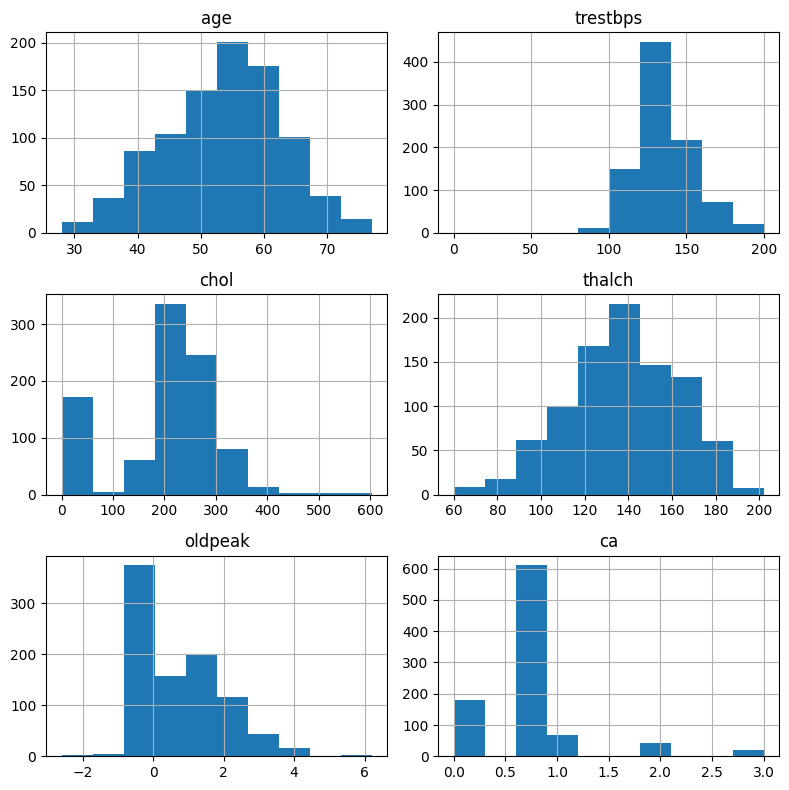

In [ ]:
#histogram for all numeric values
df[numeric_cols].hist(figsize=(8,8))  #size 15-10
plt.tight_layout()   #adjust space in plotting
plt.show()

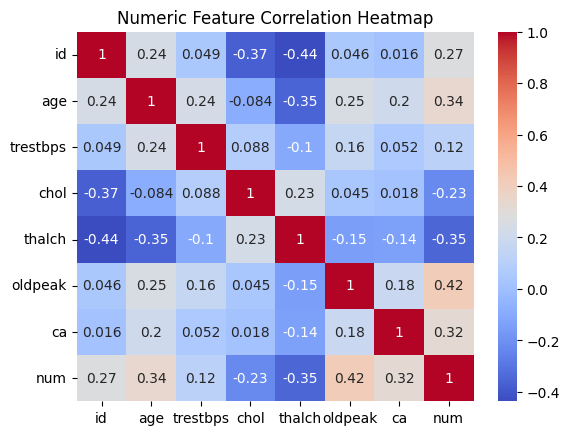

In [ ]:
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Numeric Feature Correlation Heatmap')
plt.show()

#darker the column clr, denser the relation is
#the top left to right diagonal is most corelated but the top right to left diagonal is least


Day 2 : MODEL TRAINING

In [ ]:
# Select all columns that have object dtype (usually categorical/text columns)
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

# If the column named 'num' is present in cat_cols (sometimes stored as object type by mistake),
# remove it from the list so it's not treated as a categorical variable
if 'num' in cat_cols:
    cat_cols.remove('num')


In [ ]:
x = df.drop('num', axis=1)     #removed column named as number, axis 1 says drop a column (axis = 0 is fr dropping row)
y = (df['num'] > 0).astype(int)   #binary target conversion- 0 for no heart disease, 1 for heart disease

In [ ]:
x = pd.get_dummies(x, columns=cat_cols)   #using ONE HOT ENCODING - dummies
print("Final feature columns : ", x.columns)

#One-hot encoding is a method to convert categorical data (like “Male”, “Female”, “Yes”, “No”, “Red”, “Blue”) into numeric format so that ml models can understand it.
#Each row gets a 1 in the column that represents its category, and 0 in others.
#This avoids giving categories a false numeric order (e.g., Male=1, Female=2 would wrongly imply Female > Male).

#redesigning for machine to understand

Final feature columns :  Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca',
       'sex_Female', 'sex_Male', 'dataset_Cleveland', 'dataset_Hungary',
       'dataset_Switzerland', 'dataset_VA Long Beach', 'cp_asymptomatic',
       'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina',
       'fbs_False', 'fbs_True', 'restecg_lv hypertrophy', 'restecg_normal',
       'restecg_st-t abnormality', 'exang_False', 'exang_True',
       'slope_downsloping', 'slope_flat', 'slope_upsloping',
       'thal_fixed defect', 'thal_normal', 'thal_reversable defect'],
      dtype='object')


Day 3 : Advanced models and feature engineering
train-test split, normalisation, modelling and model evaluation

training data is for training
testing is to see how well the model learns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler    #we will set a standard value like converting marks into percentage
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)  #random state gives same amount of split everytime

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

#fit_transform on training data → learn scaling & apply it.
#transform on test data → apply same scaling rules.
#transformed the test data

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_model = LogisticRegression()   #eg : giving admission to new student
lr_model.fit(x_train_scaled, y_train)   #main training step

LogisticRegression()

In [ ]:
#model evaluation
from sklearn.metrics import accuracy_score, classification_report

y_pred_lr = lr_model.predict(x_test_scaled)

accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

#accuracy should be between 75-98 sometimes 99 too... if its 100 its overfitting, not good
#0 is for no heart disease, 1 for heart disease present
#

Logistic Regression Accuracy: 0.842391304347826

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81        75
           1       0.88      0.85      0.87       109

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



DAY 4 : Random Forest and feature importance

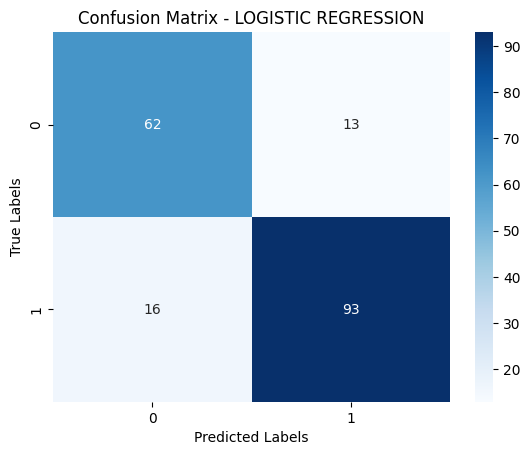

Confusion Matrix:
 [[62 13]
 [16 93]]


'\nassemble machine learning algo - kind of meta estimator that fits number of decision tree classifiers on subsamples like dividing\nand then using an average to predict the accuracy to controll the overfitting and underfitting\n'

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - LOGISTIC REGRESSION')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
print("Confusion Matrix:\n", cm)

#draws matrix into colour grid
#HIGH TRUE POSITIVE - (1,1) - 93
#TRUE NEGATIVE - LIGHT BLUE - (0,0) - 62
#FALSE POSITIVE - (1,0) - 13 - TELLING THE DISEASE WHEN IT IS NOT THE DISEASE - LESS HARMFULL
#FALSE NEGATIVE - (0,1) - 16 - ACTUAL POSITIVES ARE MISSED - DISEASE NOT DETECTED BUT IT SHOOULD HAVE BEEN - MOST CRITICAL PART

#Random forest - assemble machine learning algo - used for classification - every decision tree will give prediction and majority or average will be taken as output
"""
assemble machine learning algo - kind of meta estimator that fits number of decision tree classifiers on subsamples like dividing
and then using an average to predict the accuracy to controll the overfitting and underfitting
"""

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)    #storing the model
rf_model.fit(x_train_scaled, y_train)
y_pred_rf = rf_model.predict(x_test_scaled)   #scaled data storing

accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))    #accuracy check
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))



Random Forest Accuracy: 0.8858695652173914

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86        75
           1       0.92      0.89      0.90       109

    accuracy                           0.89       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



Text(0, 0.5, 'Features')

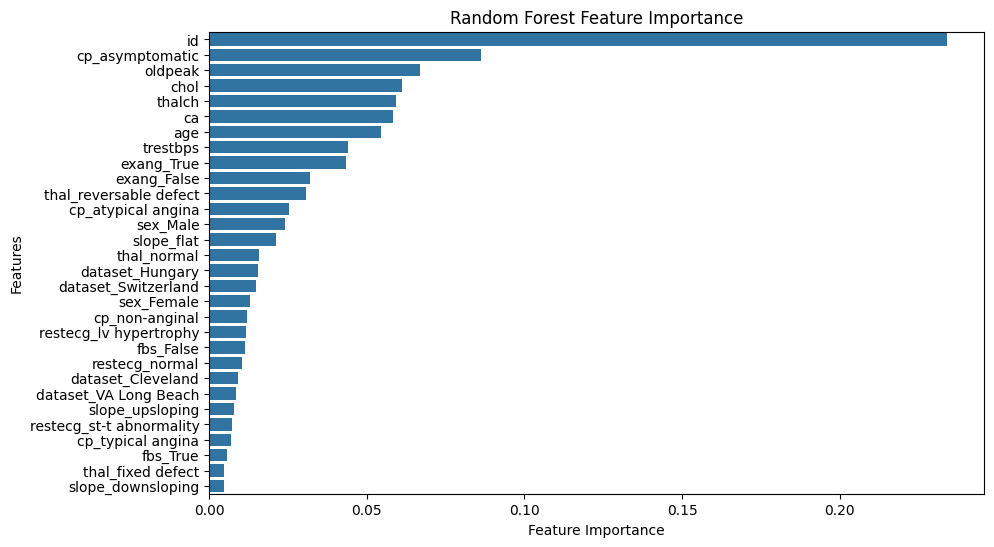

In [ ]:
 #feature importance
 feat_importances = pd.Series(rf_model.feature_importances_, index=x.columns)
 feat_importances.sort_values(ascending=False, inplace=True)
 plt.figure(figsize=(10, 6))
 sns.barplot(x=feat_importances, y=feat_importances.index)
 plt.title('Random Forest Feature Importance')
 plt.xlabel('Feature Importance')
 plt.ylabel('Features')

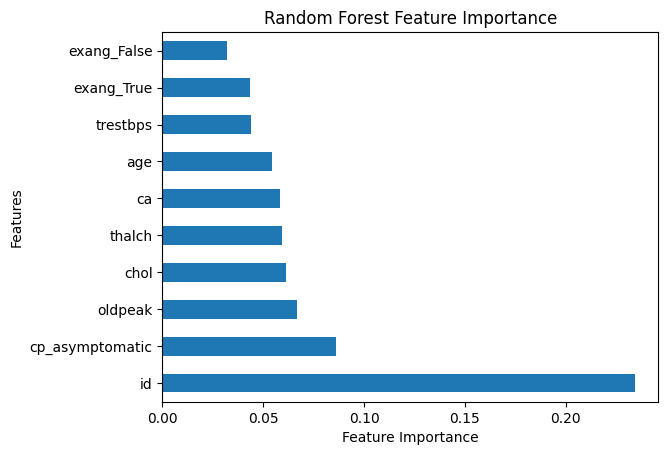

In [ ]:
 #feature importance
 feat_importances = pd.Series(rf_model.feature_importances_, index=x.columns)   #rf_model - importing trained model and checking the feature importances
 feat_importances.nlargest(10).plot(kind='barh')    #top 10 enlarged features
 plt.title('Random Forest Feature Importance')
 plt.xlabel('Feature Importance')
 plt.ylabel('Features')
 plt.show()

In [ ]:
#save the model into an environment

import joblib
joblib.dump(rf_model, 'heart_rf_model.pkl')
joblib.dump(scaler, 'heart_scaler.pkl')
#saving dataset in structured and unstructured way
#using google collab thats why pkl file
#joblib is used to load the pkl file

['heart_scaler.pkl']

In [ ]:
sample = x.head(1)
sample.to_csv('Heart_user_template.csv', index=False)  #only say the data and column name...rows input from our end
print("User Template saved as Heart_user_template.csv")

User Template saved as Heart_user_template.csv


DAY 5 : LIVE PREDICTION

In [ ]:
from google.colab import files
files.upload()

Saving heart_dataset.csv to heart_dataset (1).csv


{'heart_dataset (1).csv': b'age,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina\n58,130,220,1,normal,150,False,1.4,flat,0,fixed defect,0,1,0,0,0,1\n67,160,276,0,lv hypertrophy,108,True,1.5,flat,3,normal,0,1,1,0,0,0\n42,120,230,0,normal,170,False,1.0,upsloping,0,reversable defect,1,0,0,0,1,0\n50,130,210,0,lv hypertrophy,158,False,0.8,flat,0,normal,0,1,0,0,1,0\n45,114,230,0,normal,165,False,1.1,downsloping,0,normal,1,0,0,1,0,0\n'}

In [ ]:
import joblib
import pandas as pd

user_df = pd.read_csv('heart_dataset.csv')

# Get column lists from training dataframe
numeric_cols = df.select_dtypes(include='number').columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()
bool_cols = df.select_dtypes(include='bool').columns.tolist()

# Drop columns not in user_df to avoid errors
numeric_cols = [col for col in numeric_cols if col in user_df.columns]
cat_cols = [col for col in cat_cols if col in user_df.columns]
bool_cols = [col for col in bool_cols if col in user_df.columns]

# Fill missing values in numeric columns with training set mean
user_df[numeric_cols] = user_df[numeric_cols].fillna(df[numeric_cols].mean())

# Fill missing values in categorical columns with 'Unknown'
for col in cat_cols:
    user_df[col] = user_df[col].fillna('Unknown')

# Convert boolean columns to int
for col in bool_cols:
    user_df[col] = user_df[col].astype(int)

# One-hot encode categorical columns
user_df_encoded = pd.get_dummies(user_df, columns=cat_cols)

# Align columns with training features X.columns
user_df_encoded = user_df_encoded.reindex(columns=x.columns, fill_value=0)

# Scale data
scaler = joblib.load('heart_scaler.pkl')
user_scaled = scaler.transform(user_df_encoded)

# Predict
model = joblib.load('heart_rf_model.pkl')
preds = model.predict(user_scaled)
user_df['Heart_Disease_Prediction'] = preds

print(user_df)



   age  trestbps  chol  fbs         restecg  thalch  exang  oldpeak  \
0   58       130   220    1          normal     150  False      1.4   
1   67       160   276    0  lv hypertrophy     108   True      1.5   
2   42       120   230    0          normal     170  False      1.0   
3   50       130   210    0  lv hypertrophy     158  False      0.8   
4   45       114   230    0          normal     165  False      1.1   

         slope  ca               thal  sex_Female  sex_Male  cp_asymptomatic  \
0         flat   0       fixed defect           0         1                0   
1         flat   3             normal           0         1                1   
2    upsloping   0  reversable defect           1         0                0   
3         flat   0             normal           0         1                0   
4  downsloping   0             normal           1         0                0   

   cp_atypical angina  cp_non-anginal  cp_typical angina  \
0                   0           

In [ ]:
!pip install streamlit tensorflow opencv-python pillow


In [ ]:
!pip install streamlit pyngrok

In [ ]:
%%writefile app.py
import streamlit as st
import numpy as np
import pandas as pd
import joblib

# -----------------------------
# Load model, scaler, and template
# -----------------------------
@st.cache_resource
def load_resources():
    model = joblib.load("heart_rf_model.pkl")
    scaler = joblib.load("heart_scaler.pkl")
    template = pd.read_csv("Heart_user_template.csv")  # 30 columns
    template = template.drop(columns=["target"], errors="ignore")
    return model, scaler, template

model, scaler, template = load_resources()

# -----------------------------
# Helper: preprocess input
# -----------------------------
def preprocess_input(data_dict):
    # Convert dict → DataFrame
    df = pd.DataFrame([data_dict])

    # One-hot encode (must match training)
    df_encoded = pd.get_dummies(df)

    # Align with training columns (30 features)
    df_encoded = df_encoded.reindex(columns=template.columns, fill_value=0)

    # Scale
    df_scaled = scaler.transform(df_encoded)
    return df_scaled

# -----------------------------
# Streamlit UI
# -----------------------------
st.set_page_config(page_title="Heart Disease Predictor ❤️", page_icon="🫀", layout="centered")
st.title("🫀 Heart Disease Predictor")

st.markdown(
    """
    Welcome! Enter your health details below and let's check
    the possibility of **Heart Disease** with AI assistance.
    """
)

# Collect inputs (raw 13 features)
age = st.number_input("Age", 1, 120, 45)
sex = st.selectbox("Sex", ["Male", "Female"])
cp = st.selectbox("Chest Pain Type", [0, 1, 2, 3])
trestbps = st.number_input("Resting BP (mm Hg)", 80, 200, 120)
chol = st.number_input("Cholesterol (mg/dl)", 100, 600, 200)
fbs = st.selectbox("Fasting Blood Sugar > 120", ["Yes", "No"])
restecg = st.selectbox("Rest ECG", [0, 1, 2])
thalach = st.number_input("Max Heart Rate", 70, 220, 150)
exang = st.selectbox("Exercise Induced Angina", ["Yes", "No"])
oldpeak = st.number_input("ST Depression", 0.0, 10.0, 1.0, step=0.1)
slope = st.selectbox("Slope", [0, 1, 2])
ca = st.selectbox("Major Vessels", [0, 1, 2, 3])
thal = st.selectbox("Thalassemia", [0, 1, 2])

# -----------------------------
# Prediction
# -----------------------------
if st.button("Predict"):
    # Build dictionary for input
    input_dict = {
        "age": age,
        "sex": 1 if sex == "Male" else 0,
        "cp": cp,
        "trestbps": trestbps,
        "chol": chol,
        "fbs": 1 if fbs == "Yes" else 0,
        "restecg": restecg,
        "thalach": thalach,
        "exang": 1 if exang == "Yes" else 0,
        "oldpeak": oldpeak,
        "slope": slope,
        "ca": ca,
        "thal": thal
    }

    processed = preprocess_input(input_dict)

    prediction = model.predict(processed)[0]
    probability = model.predict_proba(processed)[0][1]

    # Show results
    if prediction == 1:
        st.error(
            f"⚠️ Heart Disease Detected with probability {probability:.2f}\n\n"
            "💡 Please consult a cardiologist immediately."
        )
    else:
        st.success(
            f"✅ No Heart Disease Detected (probability {1 - probability:.2f})\n\n"
            "✨ *'Take care of your heart, it's the rhythm of life.'* 💖"
        )

    st.markdown(
        """
        ---
        🌱 *"Health is the real wealth. Care for your heart today,
        and it will care for your tomorrow."* 💙
        """,
        unsafe_allow_html=True
    )


Overwriting app.py


In [ ]:
!ngrok authtoken 309KFcPtopLpMIdnfjFPw7XLBsW_67HT4VY7gGeeYZ6Yhd5nu

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
import os
import threading

def run_streamlit():
    os.system('streamlit run app.py --server.port 8501')

thread = threading.Thread(target = run_streamlit)
thread.start()

In [ ]:
from pyngrok import ngrok
import time

#wait a few sec
time.sleep(5)

#create a tunnel to streamlit port 8501
public_url = ngrok.connect(8501)
print("Your Streamlit app is live here:", public_url)

Your Streamlit app is live here: NgrokTunnel: "https://f3cdc496ca44.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
!streamlit run app.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.30.128.57:8501

  Stopping...
  Stopping...
Exception ignored in: <module 'threading' from '/usr/lib/python3.12/threading.py'>
Traceback (most recent call last):
  File "/usr/lib/python3.12/threading.py", line 1597, in _shutdown
    if _main_thread.ident == get_ident():
       ^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/threading.py", line 1198, in ident
    @property

  File "/usr/local/lib/python3.12/dist-packages/streamlit/web/bootstrap.py", line 43, in signal_handler
    server.stop()
  File "/usr/local/lib/python3.12/dist-packages/streamlit/web/server/server.py", line 509, in stop
    self._runtime.stop()
  File "/usr/local/lib/python3.12/dist-packages/streamlit/runtime/runtime.py", line 329, in stop
    async_objs.eventloop.call_soon_threadsafe(stop_on_eventloop)
  File "/usr/lib/python3.12/asyncio/base_events.py", line 

In [ ]:
import joblib

# Save trained model
joblib.dump(model, "disease_model.pkl")

# If you used scaler/encoder, save them too
joblib.dump(scaler, "scaler.pkl")
# joblib.dump(encoder, "encoder.pkl")

print("✅ Model & preprocessing files saved successfully!")



✅ Model & preprocessing files saved successfully!


In [ ]:
from google.colab import files
files.download("disease_model.pkl")
files.download("scaler.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>